In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('/content/train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [9]:
# replacing the missing values in "Age" column with mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

# finding the mode value of "Embarked" column
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [10]:
print(df['Embarked'].mode()[0])

S


In [11]:
# replacing the missing values in "Embarked" column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

# drop the "Cabin" column from the dataframe
df = df.drop(columns=['Cabin'],axis=1)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#finding the number of peaple survived or not
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visulization

In [15]:
sns.set()

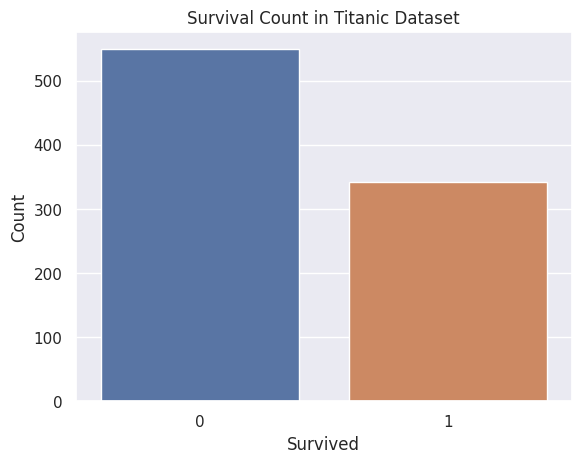

In [16]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count in Titanic Dataset')
plt.show()

In [17]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

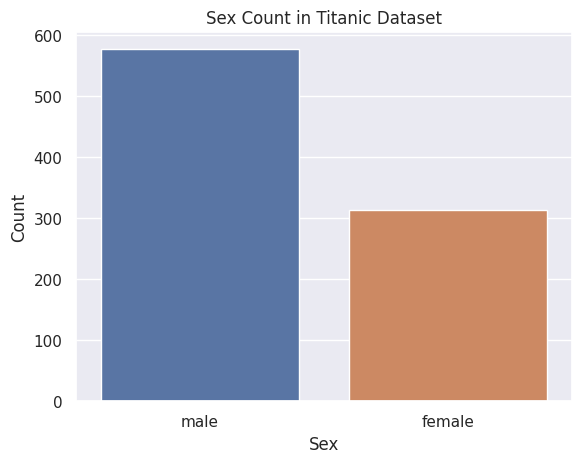

In [18]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Count in Titanic Dataset')
plt.show()

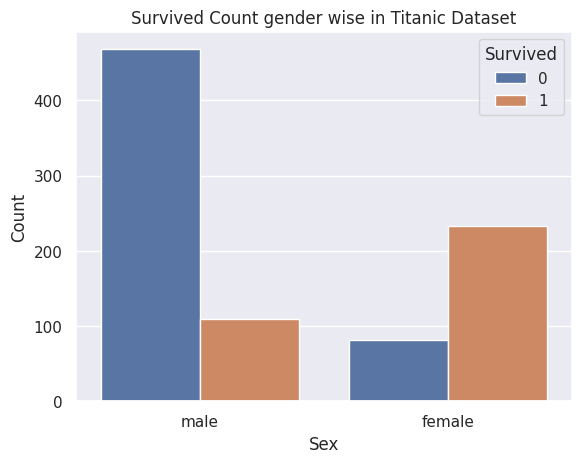

In [19]:
# number of survivors Gender wise
sns.countplot(x='Sex',hue='Survived' ,data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survived Count gender wise in Titanic Dataset')
plt.show()

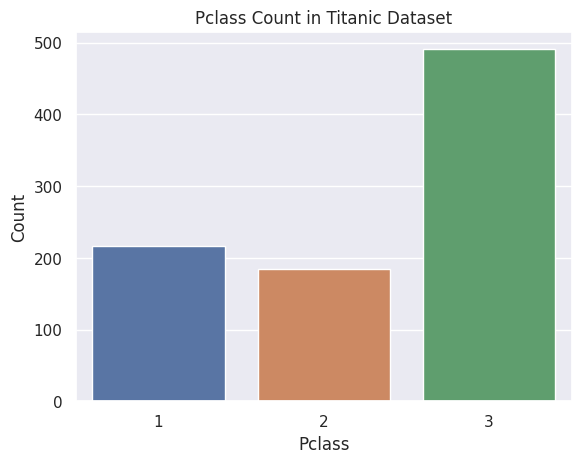

In [20]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=df)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass Count in Titanic Dataset')
plt.show()

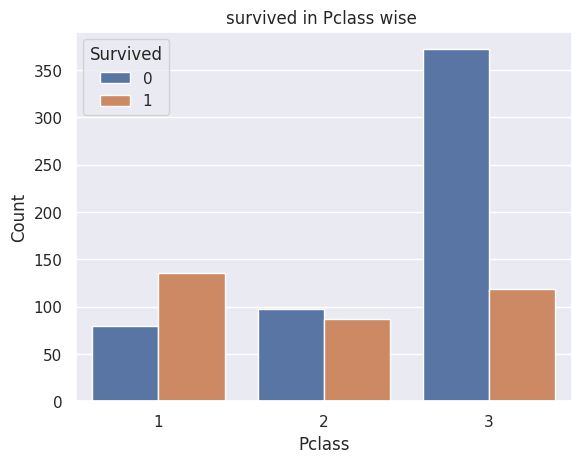

In [21]:
# count of survived in Pclass wise
sns.countplot(x='Pclass',hue='Survived', data=df)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('survived in Pclass wise ')
plt.show()

Encoding catogorical columns

In [22]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
#converting catogorical column
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Seperating features and target

In [26]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'])
y = df['Survived']

train test split data

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


Model Training

Logistic Regression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy score

In [31]:
#accuracy score on training data
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train,X_train_pred)
print("Accuracy score on training data: ",training_data_accuracy)

Accuracy score on training data:  0.8075842696629213


In [32]:
#accuracy score on testing data
X_test_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(y_test,X_test_pred)
print("Accuracy score on testing data: ",testing_data_accuracy)

Accuracy score on testing data:  0.7821229050279329
